In [2]:
import pandas as pd

# Cargar el archivo CSV con los datos del Curiosity
df = pd.read_csv("localized_interp.csv")

# Mostrar las primeras filas para entender la estructura
print(df.head())

print(df.columns)#verificar que nombres de columnas coinciden



   frame  site  drive  pose  landing_x  landing_y  landing_z    northing  \
0   SITE     1     -1    -1        0.0        0.0        0.0 -272039.268   
1  ROVER     1      0     0        0.0        0.0        0.0 -272039.268   
2  ROVER     1      2    -1        0.0        0.0        0.0 -272039.268   
3  ROVER     1      4    -1        0.0        0.0        0.0 -272039.268   
4  ROVER     1      6    -1        0.0        0.0        0.0 -272039.268   

       easting  planetocentric_latitude  ...  dem_pixel_sample   roll  pitch  \
0  8146811.223                -4.589467  ...           5773.73  0.000 -0.000   
1  8146811.223                -4.589467  ...           5773.73 -2.414 -3.612   
2  8146811.223                -4.589467  ...           5773.73  0.000 -0.000   
3  8146811.223                -4.589467  ...           5773.73 -2.414 -3.612   
4  8146811.223                -4.589467  ...           5773.73 -2.414 -3.612   

       yaw    quat_s   quat_v1   quat_v2   quat_v3       sclk 

In [3]:
def obtener_coordenadas(sol=None):
    """
    Obtiene las coordenadas de todos los soles o de un sol específico.

    Parámetros:
    - sol: Número de sol (int) o None para obtener todas las coordenadas.

    Retorna:
    - DataFrame con latitud planetocéntrica, latitud planetodésica, longitud y elevación.
    """
    columnas_interes = ["sol", "planetocentric_latitude", "planetodetic_latitude", "longitude", "elevation"]
    
    # Filtrar por el sol si se especifica, o devolver todos los datos
    if sol is not None:
        df_filtrado = df[df["sol"] == sol][columnas_interes]
    else:
        df_filtrado = df[columnas_interes]

    return df_filtrado

# Obtener coordenadas de todos los soles
coordenadas_todos = obtener_coordenadas()
print(coordenadas_todos)

# Obtener coordenadas de un sol específico (ejemplo: sol 125)
coordenadas_sol_125 = obtener_coordenadas(125)
print(coordenadas_sol_125)


        sol  planetocentric_latitude  planetodetic_latitude   longitude  \
0        -1                -4.589467              -4.643738  137.441633   
1         0                -4.589467              -4.643738  137.441633   
2         0                -4.589467              -4.643738  137.441633   
3         0                -4.589467              -4.643738  137.441633   
4         0                -4.589467              -4.643738  137.441633   
...     ...                      ...                    ...         ...   
43224  4307                -4.786800              -4.843382  137.407631   
43225  4307                -4.786801              -4.843384  137.407629   
43226  4309                -4.786798              -4.843381  137.407633   
43227  4309                -4.786795              -4.843377  137.407636   
43228  4309                -4.786791              -4.843374  137.407640   

       elevation  
0      -4501.040  
1      -4501.040  
2      -4501.040  
3      -4501.040  
4   

In [4]:
coordenadas_todos.to_csv("coordenadas_todos_los_soles.csv", index=False)
coordenadas_sol_125.to_csv("coordenadas_sol_125.csv", index=False)

Matplotlib is building the font cache; this may take a moment.


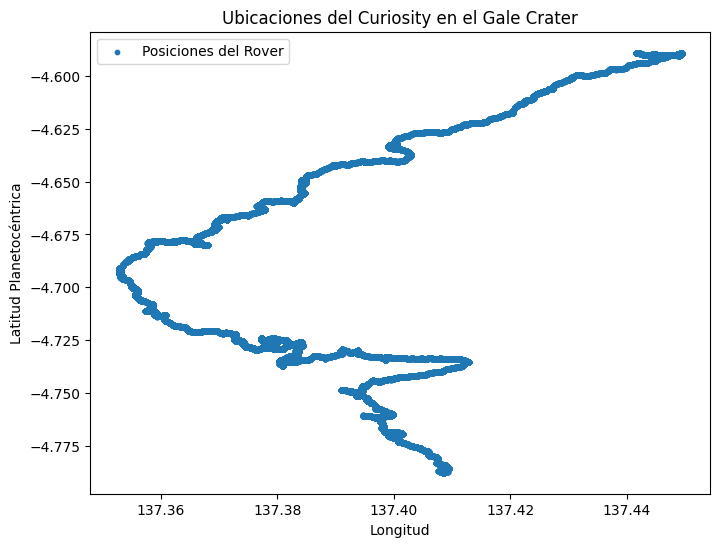

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["planetocentric_latitude"], marker="o", s=10, label="Posiciones del Rover")
plt.xlabel("Longitud")
plt.ylabel("Latitud Planetocéntrica")
plt.title("Ubicaciones del Curiosity en el Gale Crater")
plt.legend()
plt.show()
